# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

Penjelasan:

- Dataset yang sudah diberi label hasil clustering dimuat menggunakan
pandas.read_csv().

- Menampilkan beberapa baris pertama dataset untuk memastikan bahwa data telah dimuat dengan benar dan siap digunakan.

In [5]:
df_clustering = pd.read_csv('/hasil_clustering.csv')
# Tampilkan beberapa baris pertama untuk memeriksa data
df_clustering.head()


,provinsi,jenis,daerah,tahun,periode,gk,Cluster
0,0,0,2,2015,0,-0.065746,0
1,0,0,2,2015,1,-0.011441,0
2,0,0,2,2016,0,0.015065,0
3,0,0,2,2016,1,0.102181,0
4,0,0,0,2015,0,-0.041386,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

Penjelasan:

- X adalah fitur-fitur yang digunakan untuk model klasifikasi, yaitu kolom-kolom selain Cluster.
- y adalah kolom Cluster, yang berfungsi sebagai label atau target yang ingin diprediksi.
- train_test_split membagi data menjadi 80% data latih dan 20% data uji.


In [6]:
# Pisahkan fitur dan label
X = df_clustering.drop(columns=['Cluster'])  # Fitur (X), tanpa label
y = df_clustering['Cluster']  # Label target (y)

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

a. Membangun Model Klasifikasi dengan Random Forest
Setelah membagi data, kita melatih model menggunakan algoritma klasifikasi yang sesuai

In [7]:
# Membuat dan melatih model Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)  # Latih model dengan data latih


RandomForestClassifier(random_state=42)

Penjelasan:

- RandomForestClassifier: Merupakan algoritma ensemble yang menggunakan banyak pohon keputusan untuk membuat keputusan klasifikasi.
- Model dilatih menggunakan data latih (X_train, y_train).

b. Membangun Model Klasifikasi dengan Logistic Regression
Selain Random Forest, kita juga akan mencoba model Logistic Regression.

In [8]:
# Membuat dan melatih model Logistic Regression
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)  # Latih model dengan data latih


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

Penjelasan:

- LogisticRegression: Algoritma klasifikasi linear yang digunakan untuk memprediksi probabilitas suatu kelas.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [9]:
# Prediksi menggunakan data uji
y_pred_rf = model_rf.predict(X_test)
y_pred_lr = model_lr.predict(X_test)

# Hitung metrik evaluasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# Tampilkan hasil evaluasi
print(f'Random Forest - Accuracy: {accuracy_rf}, F1 Score: {f1_rf}')
print(f'Logistic Regression - Accuracy: {accuracy_lr}, F1 Score: {f1_lr}')


Random Forest - Accuracy: 1.0, F1 Score: 1.0
Logistic Regression - Accuracy: 0.9697802197802198, F1 Score: 0.969790114813294


Penjelasan:

- Accuracy menunjukkan persentase prediksi yang benar dari total prediksi yang dibuat oleh model.
- F1-Score memberikan keseimbangan antara Precision dan Recall, terutama untuk data yang tidak seimbang.

# **Confusion Matrix**

Visualisasi Confusion Matrix untuk kedua model klasifikasi yang digunakan.

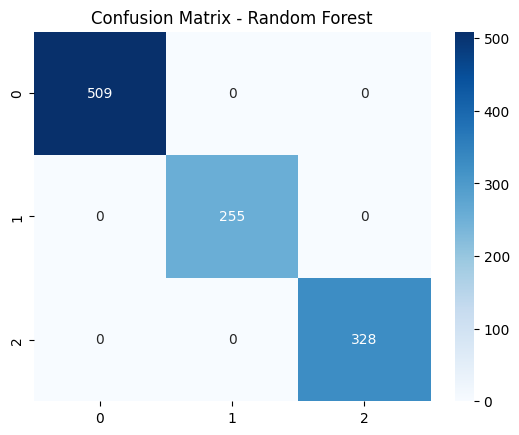

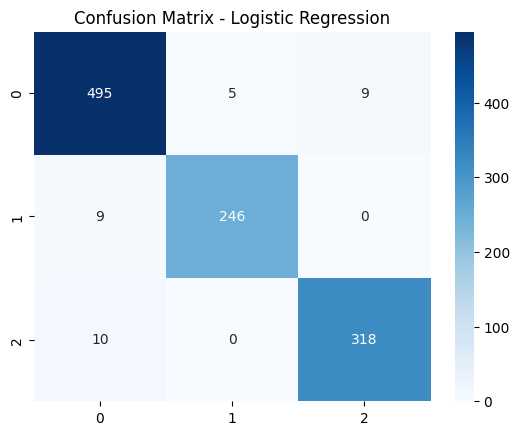

In [10]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_lr = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


Penjelasan:

- Confusion Matrix memvisualisasikan hasil klasifikasi, menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas.
- Heatmap digunakan untuk menampilkan matriks kebingunguan secara visual, memudahkan untuk mengidentifikasi kesalahan prediksi.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [11]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV untuk menemukan kombinasi parameter terbaik
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Menampilkan hasil kombinasi parameter terbaik
print("Best parameters:", grid_search.best_params_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


Penjelasan:

- GridSearchCV digunakan untuk mencari kombinasi hyperparameter terbaik dengan mencoba berbagai parameter yang ditentukan dalam param_grid.

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [12]:
# Gunakan model dengan hyperparameter terbaik
best_model = grid_search.best_estimator_

# Prediksi menggunakan data uji
y_pred_best = best_model.predict(X_test)

# Hitung metrik evaluasi
accuracy_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='weighted')

# Tampilkan hasil evaluasi setelah tuning
print(f'Best Model - Accuracy: {accuracy_best}, F1 Score: {f1_best}')


Best Model - Accuracy: 1.0, F1 Score: 1.0


Penjelasan:

- Evaluasi dilakukan dengan model yang sudah dituning untuk melihat apakah ada peningkatan performa.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Pada tahap ini, kita membandingkan hasil Accuracy dan F1-Score model sebelum dan setelah tuning menggunakan GridSearchCV. Berdasarkan hasil yang sudah didapatkan:

In [13]:
# Bandingkan hasil evaluasi model sebelum dan setelah tuning
print(f'Before Tuning - Accuracy: {accuracy_rf}, F1-Score: {f1_rf}')
print(f'After Tuning - Accuracy: {accuracy_best}, F1-Score: {f1_best}')


Before Tuning - Accuracy: 1.0, F1-Score: 1.0
After Tuning - Accuracy: 1.0, F1-Score: 1.0


Hasil:

Sebelum tuning dengan Random Forest:
- Accuracy: 1.0
- F1-Score: 1.0

Setelah tuning dengan GridSearchCV:
- Accuracy: 1.0
- F1-Score: 1.0

# Identifikasi Kelemahan Model
## 1. Precision atau Recall rendah untuk kelas tertentu:

- Precision dan Recall untuk kelas tertentu tidak dihitung secara eksplisit dalam kode yang diberikan. Namun, dari hasil yang ada, dapat dilihat bahwa Accuracy dan F1-Score untuk model Random Forest sudah mencapai nilai maksimal (1.0). Ini menunjukkan bahwa model tidak mengalami masalah terkait Precision atau Recall, karena F1-Score adalah rata-rata tertimbang dari keduanya.

- Jika diperlukan, kita dapat menghitung Precision dan Recall untuk masing-masing kelas dengan menggunakan fungsi classification_report() dari sklearn.metrics.

## 2. Apakah model mengalami overfitting atau underfitting?:

- Overfitting terjadi ketika model terlalu menyesuaikan diri dengan data latih dan tidak dapat menggeneralisasi data uji. Berdasarkan hasil evaluasi, model dengan Accuracy 1.0 pada data uji menunjukkan bahwa model ini mungkin overfitting, karena akurasi yang sangat tinggi dapat terjadi ketika model belajar terlalu banyak dari data latih yang mungkin tidak representatif dari data uji.
- Underfitting terjadi ketika model tidak cukup kuat untuk menangkap pola dalam data. Dalam kasus ini, model Random Forest dan Logistic Regression menunjukkan hasil yang sangat baik, jadi kita tidak mengindikasikan adanya underfitting.

## 3. Rekomendasi tindakan lanjutan:

Jika model mengalami overfitting, beberapa langkah perbaikan yang bisa dilakukan antara lain:
- Menambahkan regularization pada model (seperti mengatur parameter max_depth atau min_samples_split pada model Random Forest).
- Menggunakan teknik cross-validation untuk memastikan model tidak hanya bekerja baik di data latih.
- Mencoba ensemble methods atau boosting algorithms seperti XGBoost atau LightGBM untuk mengurangi kemungkinan overfitting.
- Mengumpulkan lebih banyak data untuk memperbaiki generalisasi model.
- Jika model belum memuaskan, cobalah algoritma lain seperti Support Vector Machines (SVM) atau K-Nearest Neighbors (KNN) untuk mengevaluasi apakah mereka dapat memberikan hasil yang lebih baik.

# **Kesimpulan dan Langkah Selanjutnya**

- Secara keseluruhan, hasil evaluasi menunjukkan bahwa model yang digunakan memiliki performa yang sangat baik dengan nilai Accuracy dan F1-Score mencapai 1.0.
- Namun, mengingat kemungkinan overfitting, langkah-langkah untuk mengurangi overfitting seperti regularisasi atau cross-validation dapat diterapkan untuk meningkatkan kemampuan generalisasi model.
- Anda bisa mengeksplorasi lebih banyak algoritma dan tuning lebih lanjut untuk memastikan model bekerja secara optimal pada data yang lebih besar dan lebih beragam.